In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/Chinmayi/Downloads/Aerofit_dataset.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## 1. Analysing basic metrics

In [6]:
df.shape
# There are a total of 180 rows and 9 columns.

(180, 9)

In [10]:
df.info()
# There are no null values in the table.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [3]:
## converting data types for different columns
df["Product"] = df["Product"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["MaritalStatus"] = df["MaritalStatus"].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [19]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## 2. Non-Graphical Analysis: Value counts and unique attributes

In [21]:
df["Product"].value_counts()
# There are only 3 products. With maximum no. of sales coming from KP281, and least sales is from KP781.

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [22]:
df["Gender"].value_counts()
# There are more men than women

Gender
Male      104
Female     76
Name: count, dtype: int64

In [23]:
df["MaritalStatus"].value_counts()
# There are more partnered users than single users.

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [24]:
df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [6]:
df["Usage"].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [7]:
df["Usage"].nunique()

6

In [26]:
df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [8]:
df["Education"].nunique()

8

## 3. Visual Analysis: Univariate/bivariate plots

<Axes: xlabel='Age', ylabel='Density'>

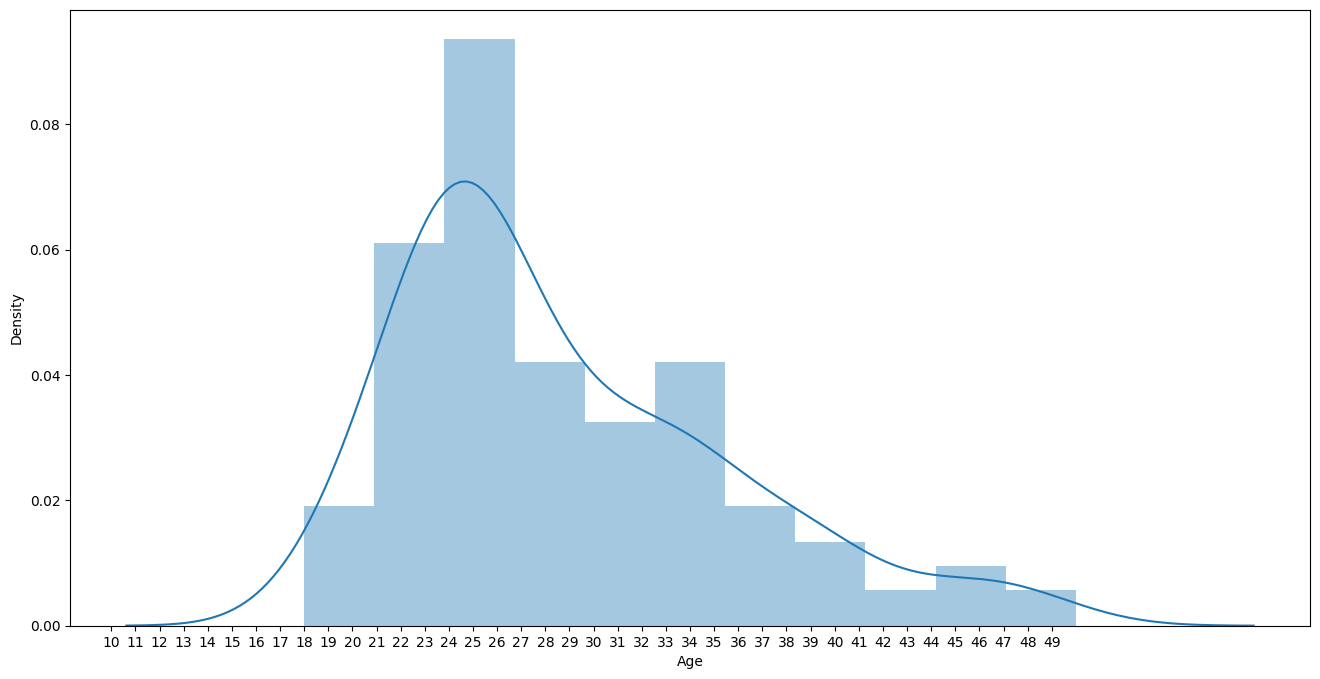

In [18]:
plt.figure(figsize=(16, 8))
plt.xticks(list(range(10,50)))
sns.distplot(df["Age"])
# Most number of people lie in the age group of 22-26

<Axes: xlabel='Education', ylabel='Count'>

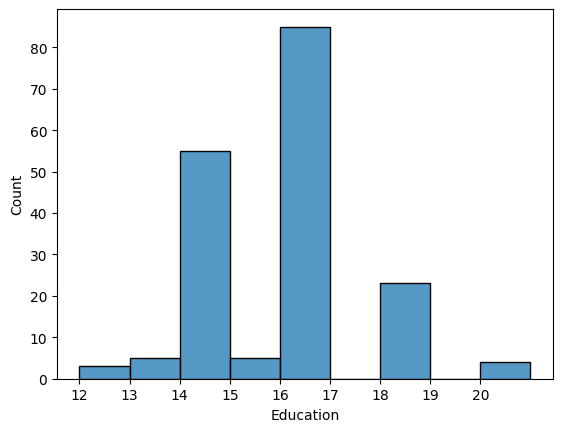

In [42]:
plt.xticks(list(range(min(df["Education"]),max(df["Education"]))))
sns.histplot(df,x = df["Education"], bins = 9)
# Most users have education of 14 or 16 years

<Axes: xlabel='Income', ylabel='Count'>

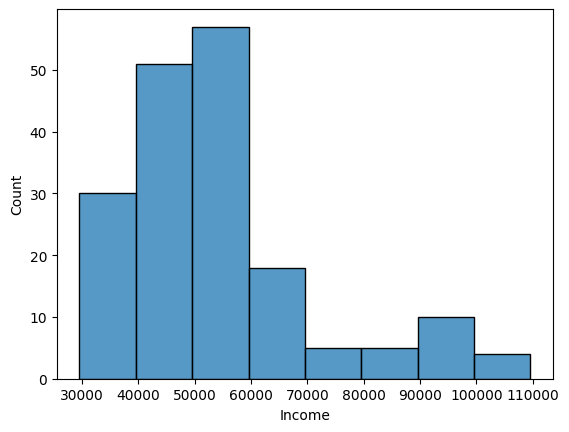

In [52]:
#plt.xticks(np.linspace(25000,105000,9))
sns.histplot(df["Income"],binwidth = 10000)

<Axes: xlabel='Product', ylabel='count'>

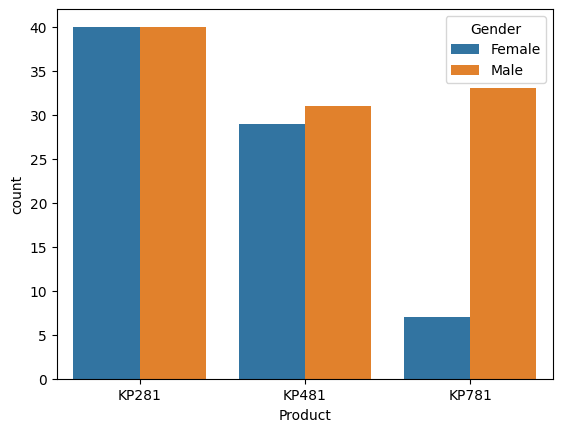

In [99]:
sns.countplot(df, x = "Product", hue = "Gender")
# KP781 is mostly purchased by Men.

In [65]:
df["Product"].value_counts()*100/np.sum(df["Product"].value_counts())
# Most people categorize themselves as average in fitness with a score of 3.

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: count, dtype: float64

<Axes: xlabel='Fitness', ylabel='count'>

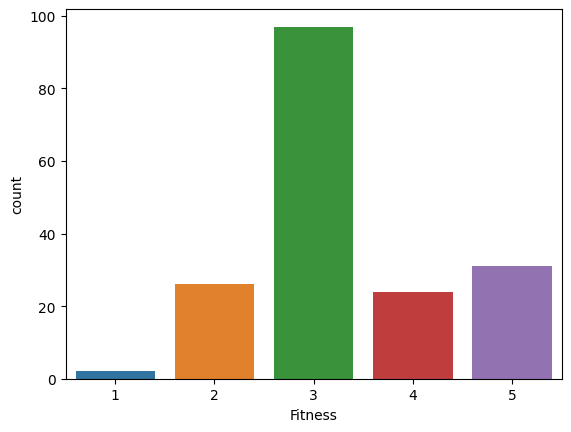

In [67]:
sns.countplot(df, x = "Fitness")

<Axes: xlabel='Usage', ylabel='count'>

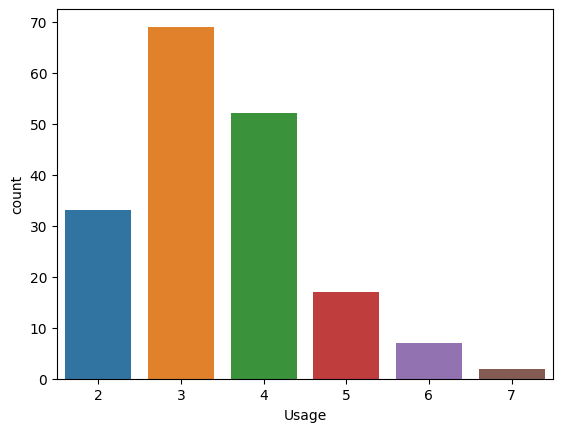

In [68]:
sns.countplot(df, x = "Usage")

<Axes: xlabel='Miles', ylabel='Count'>

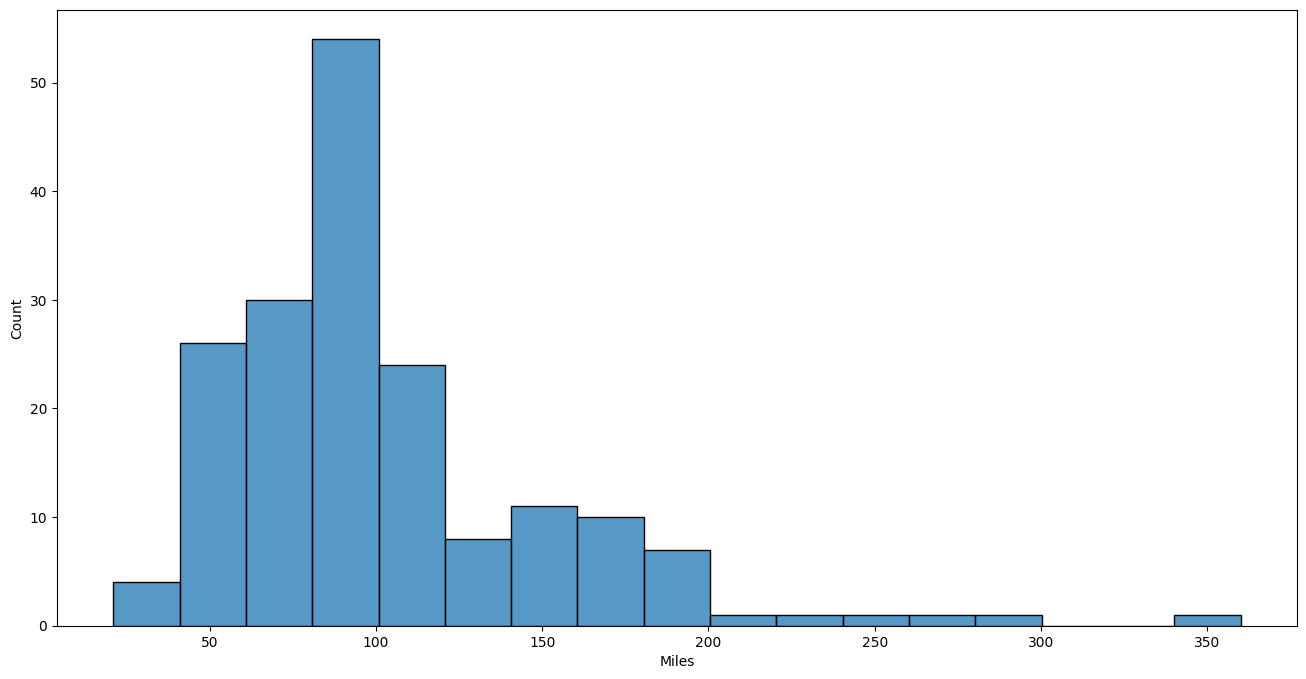

In [74]:
plt.figure(figsize=(16, 8))
#plt.xticks(np.linspace(20,360,18))
sns.histplot(df["Miles"], bins = 17)
# Majority of the people want to run 50 - 100 miles. However there are outliers.

<Axes: xlabel='Gender', ylabel='Miles'>

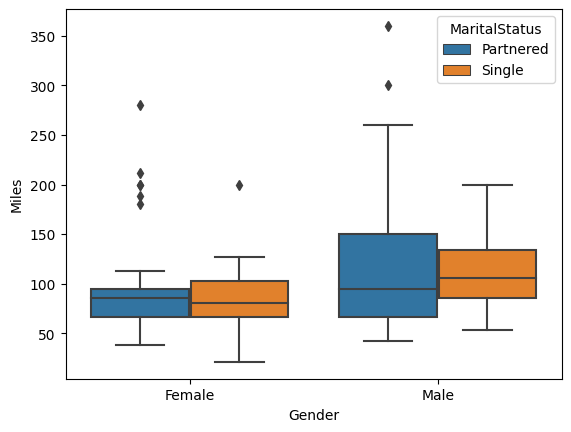

In [76]:
sns.boxplot(df, x = "Gender", y = "Miles", hue = "MaritalStatus")
#
# Men expect themselves to run more than women. Single men want to run more than partnered men, 
# whereas partnered men and women have more outliers

<Axes: xlabel='Fitness', ylabel='Age'>

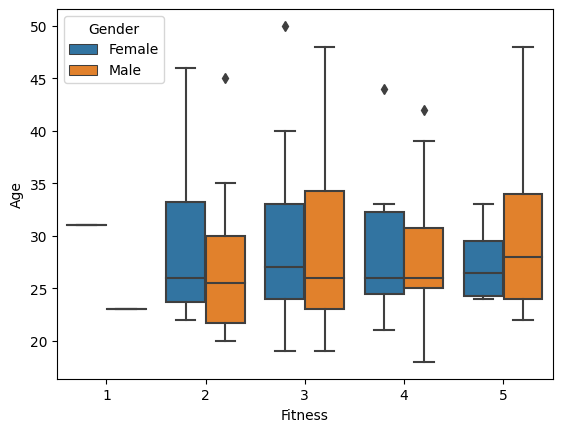

In [83]:
sns.boxplot(df, x = "Fitness", y = "Age", hue = "Gender")
# Females are observed to be older when the fitness range ins from 1-4.

<Axes: xlabel='Fitness', ylabel='Income'>

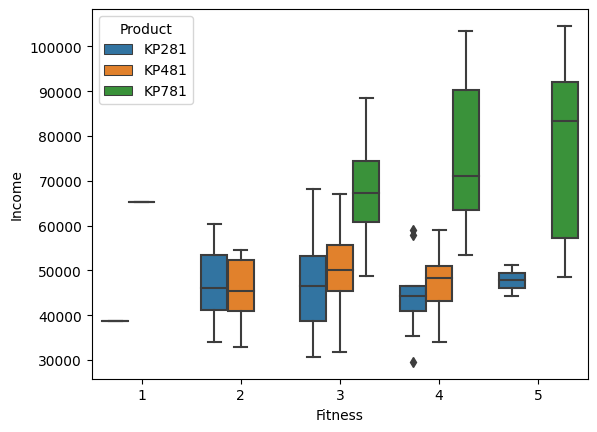

In [81]:
sns.boxplot(df, x = "Fitness", y = "Income", hue = "Product")
# people with high income tend to buy the product 'KP781'
# People with more fitness also tend to have high income

<Axes: >

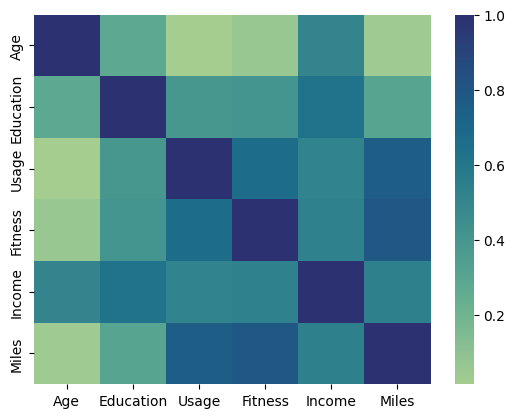

In [96]:
sns.heatmap(df.loc[:,["Age", "Education","Usage", "Fitness", "Income", "Miles"]].corr(), cmap ="crest")
#1. Usage and miles have very high correlation
#2. Usage and fitnes have very high correlation
#3. Fitness and miles have high correlation
#4. Age and Education have mild correlation between Income
#5. Education has mild correlation between Miles, Usage, Fitness
#6. Age has no correlation with fitness, usage.

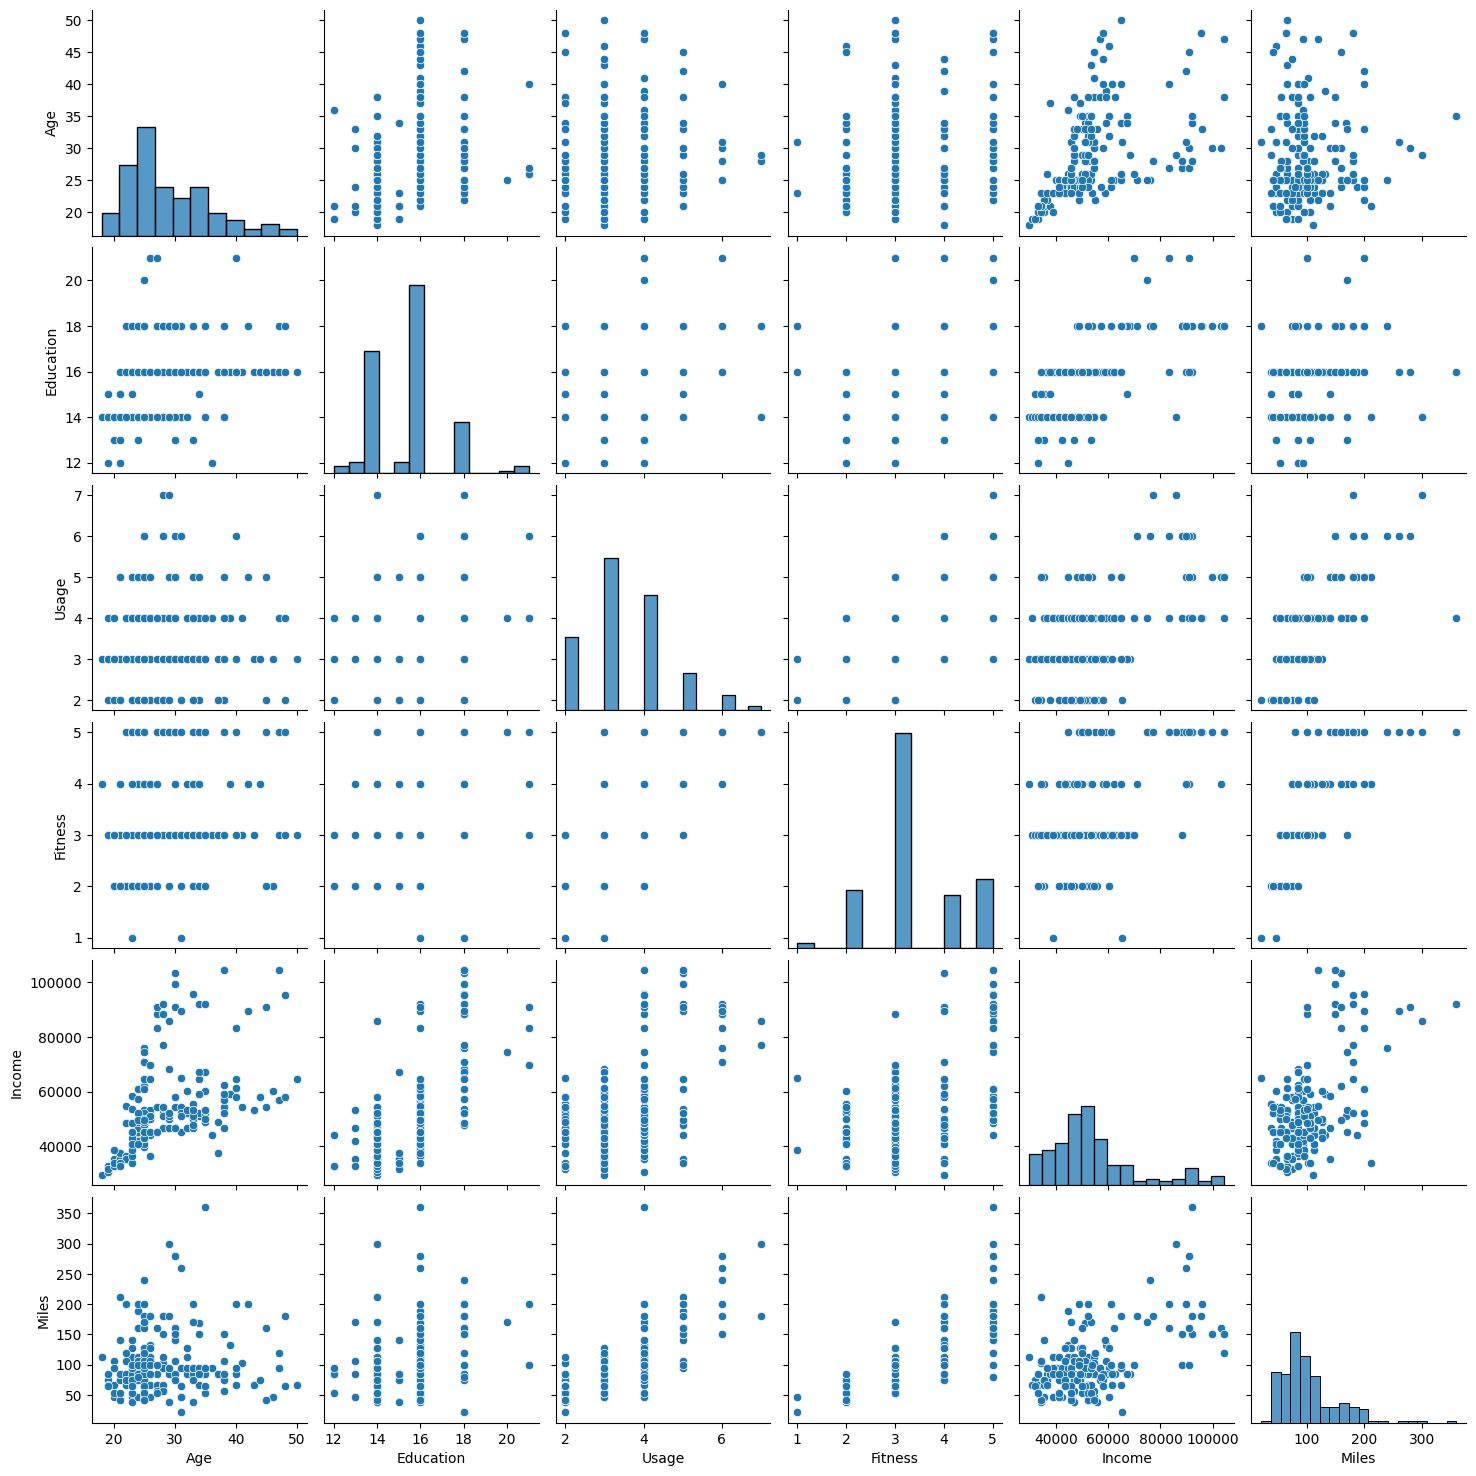

In [98]:
sns.pairplot(df)
#1. Usage and miles have very high correlation
#2. Usage and fitness have very high correlation
#3. Fitness and miles have high correlation
#4. Age and Education have mild correlation between Income
#5. Education has mild correlation between Miles, Usage, Fitness
#6. Age has no correlation with fitness, usage.

<Axes: xlabel='Income', ylabel='Miles'>

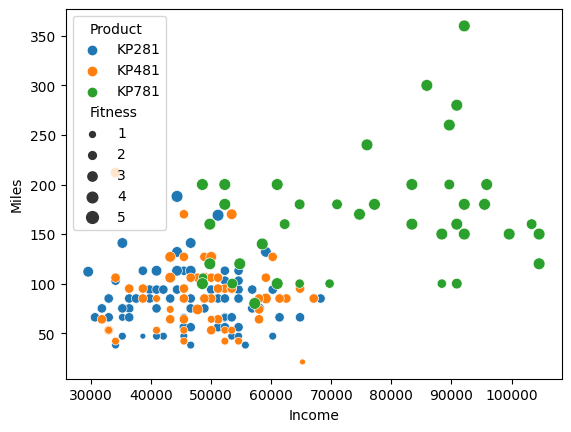

In [106]:
sns.scatterplot(df, x = "Income", y = "Miles", hue = "Product", size = "Fitness")
#High income people who want to run more tend to buy KP781

<Axes: xlabel='Education', ylabel='Usage'>

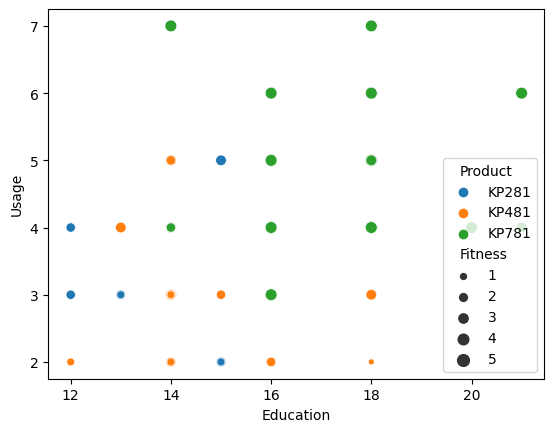

In [105]:
sns.scatterplot(df, x = "Education", y = "Usage", hue = "Product", size = "Fitness")
#People with less usage tend to buy KP481
#People with more fitness and more usage tend to buy KP781

## 4. Missing Values and Outlier detection

In [107]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [27]:
def outliers(arr):
    q1 = np.percentile(arr,25)
    q2 = np.percentile(arr,75)
    iqr = 1.5*(q2 - q1)
    low = max(q1 - iqr,0)
    high = q2 + iqr
    outliers = arr[(arr>high) | (arr<low)]
    return outliers

78     47
79     50
139    48
178    47
179    48
Name: Age, dtype: int64

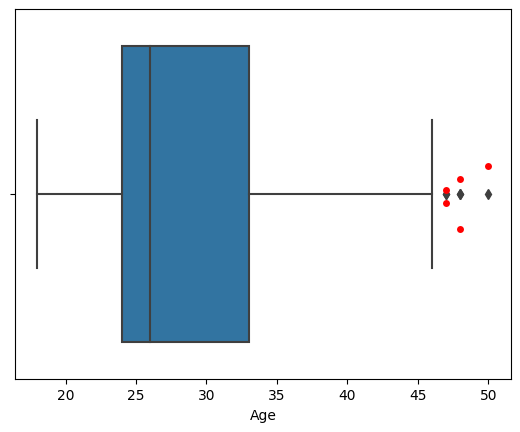

In [28]:
#Outliers in "Age" column
sns.boxplot(x = df["Age"])
sns.stripplot(x = outliers(df["Age"]), color = "red")
outliers(df["Age"])

156    20
157    21
161    21
175    21
Name: Education, dtype: int64

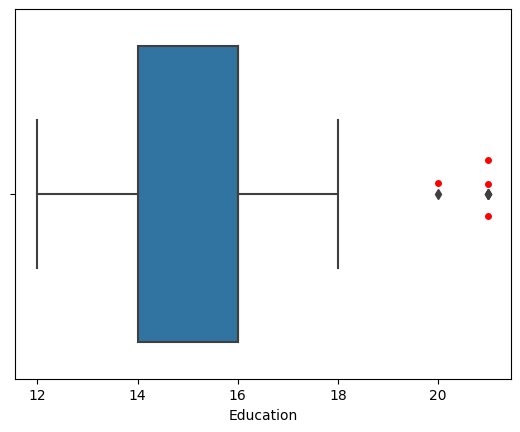

In [29]:
#Outliers in "Education" column
sns.boxplot(x = df["Education"])
sns.stripplot(x = outliers(df["Education"]), color = "red")
outliers(df["Education"])

159     83416
160     88396
161     90886
162     92131
164     88396
166     85906
167     90886
168    103336
169     99601
170     89641
171     95866
172     92131
173     92131
174    104581
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, dtype: int64

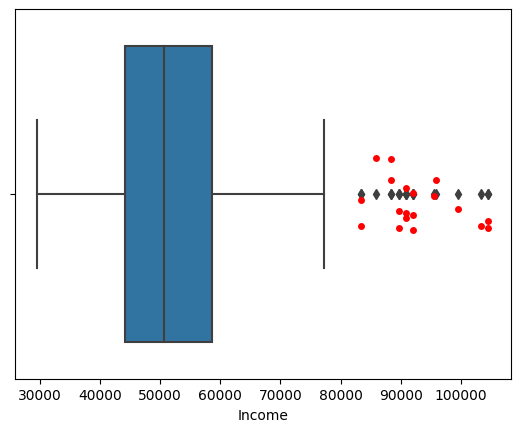

In [30]:
#Outliers in "Income" column
sns.boxplot(x = df["Income"])
sns.stripplot(x = outliers(df["Income"]), color = "red")
outliers(df["Income"])

23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200
Name: Miles, dtype: int64

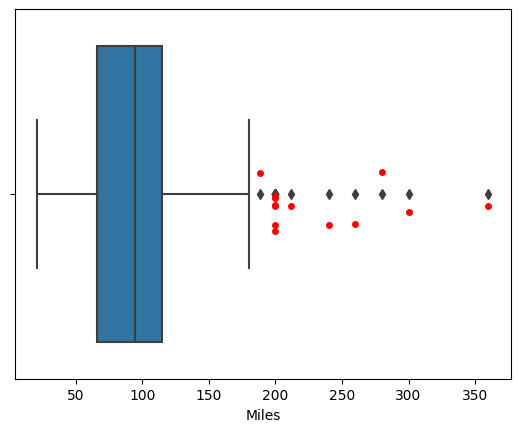

In [31]:
#Outliers in "Miles" column
sns.boxplot(x = df["Miles"])
sns.stripplot(x = outliers(df["Miles"]), color = "red")
outliers(df["Miles"])

In [84]:
#Categorzing numeric data of age
def func1(age):
    if age > np.median(df["Age"]):
        return "old"
    else:
        return "young"
    
df["age"] = df["Age"].apply(func1)

In [100]:
#Categorzing numeric data of Education
def func2(education):
    if education > np.median(df["Education"]):
        return "high edu"
    else:
        return "low edu"
    
df["education"] = df["Education"].apply(func2)

In [86]:
#Categorzing numeric data of usage
def func3(usage):
    if usage > np.median(df["Usage"]):
        return "regular"
    else:
        return "casual"
    
df["usage"] = df["Usage"].apply(func3)

In [87]:
#Categorzing numeric data of Fitness
def func4(fitness):
    if fitness > np.median(df["Fitness"]):
        return "fit"
    else:
        return "not fit"
    
df["fitness"] = df["Fitness"].apply(func4)

In [88]:
#Categorzing numeric data of Income
def func5(income):
    if income > np.median(df["Income"]):
        return "wealthy"
    else:
        return "middle class"
    
df["income"] = df["Income"].apply(func5)

In [89]:
#Categorzing numeric data of Miles
def func6(miles):
    if miles > np.median(df["Miles"]):
        return "high"
    else:
        return "low"
    
df["miles"] = df["Miles"].apply(func6)

In [101]:
# Making all the newly added columns into categorical data
df["age"] = df["age"].astype("category")
df["education"] = df["education"].astype("category")
df["usage"] = df["usage"].astype("category")
df["fitness"] = df["fitness"].astype("category")
df["income"] = df["income"].astype("category")
df["miles"] = df["miles"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age            180 non-null    category
 10  education      180 non-null    category
 11  usage          180 non-null    category
 12  fitness        180 non-null    category
 13  income         180 non-null    category
 14  miles          180 non-null    category
dtypes: category(9), int64(6)
memory usage: 11.2 KB


In [102]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age,education,usage,fitness,income,miles
0,KP281,18,Male,14,Single,3,4,29562,112,young,low edu,casual,fit,middle class,high
1,KP281,19,Male,15,Single,2,3,31836,75,young,low edu,casual,not fit,middle class,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,young,low edu,regular,not fit,middle class,low
3,KP281,19,Male,12,Single,3,3,32973,85,young,low edu,casual,not fit,middle class,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,young,low edu,regular,not fit,middle class,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,old,high edu,regular,fit,wealthy,high
176,KP781,42,Male,18,Single,5,4,89641,200,old,high edu,regular,fit,wealthy,high
177,KP781,45,Male,16,Single,5,5,90886,160,old,low edu,regular,fit,wealthy,high
178,KP781,47,Male,18,Partnered,4,5,104581,120,old,high edu,regular,fit,wealthy,high


# Customer Profiling

In [116]:
pd.crosstab([df["Gender"],df["MaritalStatus"]],df["Product"], normalize = "index")
# A partnered Female tend to prefer KP281
# Single females prefer KP481

Product                  KP281     KP481     KP781
Gender MaritalStatus                              
Female Partnered      0.586957  0.326087  0.086957
       Single         0.433333  0.466667  0.100000
Male   Partnered      0.344262  0.344262  0.311475
       Single         0.441860  0.232558  0.325581

In [118]:
pd.crosstab([df["education"],df["Gender"],df["MaritalStatus"]],df["Product"], normalize = "index")
# Highly educated males and females tend to prefer KP781
# Less educated partnered female prefer KP281
# Less educated single males prefer KP281

Product                            KP281     KP481     KP781
education Gender MaritalStatus                              
high edu  Female Partnered      0.000000  0.000000  1.000000
                 Single         0.200000  0.400000  0.400000
          Male   Partnered      0.076923  0.000000  0.923077
                 Single         0.000000  0.000000  1.000000
low edu   Female Partnered      0.627907  0.348837  0.023256
                 Single         0.480000  0.480000  0.040000
          Male   Partnered      0.416667  0.437500  0.145833
                 Single         0.513514  0.270270  0.216216

In [119]:
pd.crosstab([df["education"],df["income"],df["MaritalStatus"]],df["Product"], normalize = "index")
# Highly educated and wealthy and partnered individuals prefer KP781
# Low education and middle class people prefer KP281

Product                                  KP281     KP481     KP781
education income       MaritalStatus                              
high edu  middle class Single         0.000000  0.500000  0.500000
          wealthy      Partnered      0.062500  0.000000  0.937500
                       Single         0.111111  0.111111  0.777778
low edu   middle class Partnered      0.608696  0.369565  0.021739
                       Single         0.523810  0.404762  0.071429
          wealthy      Partnered      0.422222  0.422222  0.155556
                       Single         0.450000  0.250000  0.300000

In [95]:
pd.crosstab([df["income"],df["Gender"],df["miles"]],df["Product"], normalize = "index")
# Middle class females who want to run more prefer KP481
# Middle class males and females who want to run less prefer KP281
# Wealthy individuals(both males and females) who want to run more prefer KP781
# Similarly middle class individuals(both males and females) who want to run less prefer KP281

Product                       KP281     KP481     KP781
income       Gender miles                              
middle class Female high   0.384615  0.615385  0.000000
                    low    0.666667  0.333333  0.000000
             Male   high   0.350000  0.400000  0.250000
                    low    0.666667  0.333333  0.000000
wealthy      Female high   0.090909  0.272727  0.636364
                    low    0.631579  0.368421  0.000000
             Male   high   0.121951  0.219512  0.658537
                    low    0.631579  0.315789  0.052632

In [97]:
pd.crosstab([df["usage"],df["fitness"],df["Gender"]],df["Product"], normalize = "index")
# Fit males who want to use less prefer KP481
# Fit females who want to use less prefer KP281
# Casual female users who are not fit prefer KP281
# Overall casual users whether fit or not prefer to use KP281 or KP481
# Fit individuals(males/females) who want to use regularly prefer KP781
# Regular users(males/females) who are not fit prefer KP281 and KP481

Product                    KP281     KP481     KP781
usage   fitness Gender                              
casual  fit     Female  0.600000  0.400000  0.000000
                Male    0.333333  0.500000  0.166667
        not fit Female  0.604167  0.395833  0.000000
                Male    0.511628  0.488372  0.000000
regular fit     Female  0.111111  0.222222  0.666667
                Male    0.142857  0.028571  0.828571
        not fit Female  0.500000  0.428571  0.071429
                Male    0.550000  0.300000  0.150000

In [105]:
pd.crosstab([df["income"],df["fitness"],df["Gender"]],df["Product"], normalize = "index")
# Middle income fit females prefer KP481
# Middle income unfit individuals prefer KP281
# Wealthy fit individuals prefer KP781
# Wealthy individuals who are not fit prefer either KP281 or KP481

Product                         KP281     KP481     KP781
income       fitness Gender                              
middle class fit     Female  0.428571  0.571429  0.000000
                     Male    0.454545  0.181818  0.363636
             not fit Female  0.615385  0.384615  0.000000
                     Male    0.545455  0.424242  0.030303
wealthy      fit     Female  0.142857  0.000000  0.857143
                     Male    0.066667  0.066667  0.866667
             not fit Female  0.521739  0.434783  0.043478
                     Male    0.500000  0.433333  0.066667

In [114]:
pd.crosstab([df["income"],df["fitness"],df["Gender"]],df["Product"], normalize = "columns")
# Here we see, out of the groups of people who purchased KP281, most of them come from middle class individuals who are not fit
# Among the people who purchased KP481, we see that most of them come from middle class, 'not fit' category.
# Among the people who purchased KP781, majority is from Wealthy and fit men.

Product                       KP281     KP481  KP781
income       fitness Gender                         
middle class fit     Female  0.0375  0.066667  0.000
                     Male    0.0625  0.033333  0.100
             not fit Female  0.3000  0.250000  0.000
                     Male    0.2250  0.233333  0.025
wealthy      fit     Female  0.0125  0.000000  0.150
                     Male    0.0250  0.033333  0.650
             not fit Female  0.1500  0.166667  0.025
                     Male    0.1875  0.216667  0.050

# Recommendations

## 1. We should try to sell the product KP481 to middle class females who want to run more.

## 2. We should market the product KP281 to Middle class males and females who want to run less.

## 3. We should recommend KP281 to partnered female and KP481 to single females.

## 4. We should market the product KP281 to wealthy individuals(both males and females) who want to run more.

## 5. For fit males who want to use less we should recommend KP481, whereas for fit females who want to use less we should recommend KP281.

## 6. Overall casual users whether fit or not should be recommended KP281 or KP481.

## 7. Fit individuals(males/females) who want to use regularly should be recommended KP781.

## 8. Regular users(males/females) who are not fit should be recommended KP281 and KP481.

## 9. Middle income unfit individuals should be recommended KP281. 

## 10. KP781 is best suited for Wealthy and fit individuals. 

## 11. Wealthy individuals who are not fit should be recommended KP481.

## 12. Middle income fit females should be recommended KP481. 